In [9]:
from argparse import ArgumentParser

import yaml
from pytorch_lightning import Trainer

from gan_module import AgingGAN
import torch
from gan_module import Generator
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
# with open('configs/aging_gan.yaml') as file:
#     config = yaml.load(file, Loader=yaml.FullLoader)
#     print(config)
#     model = AgingGAN(config
model = Generator(ngf=32, n_residual_blocks=9)

In [3]:
model.state_dict().keys()

odict_keys(['model.1.weight', 'model.1.bias', 'model.2.weight', 'model.2.bias', 'model.2.running_mean', 'model.2.running_var', 'model.2.num_batches_tracked', 'model.4.weight', 'model.4.bias', 'model.5.weight', 'model.5.bias', 'model.5.running_mean', 'model.5.running_var', 'model.5.num_batches_tracked', 'model.7.weight', 'model.7.bias', 'model.8.weight', 'model.8.bias', 'model.8.running_mean', 'model.8.running_var', 'model.8.num_batches_tracked', 'model.10.conv_block.1.weight', 'model.10.conv_block.1.bias', 'model.10.conv_block.2.weight', 'model.10.conv_block.2.bias', 'model.10.conv_block.2.running_mean', 'model.10.conv_block.2.running_var', 'model.10.conv_block.2.num_batches_tracked', 'model.10.conv_block.5.weight', 'model.10.conv_block.5.bias', 'model.10.conv_block.6.weight', 'model.10.conv_block.6.bias', 'model.10.conv_block.6.running_mean', 'model.10.conv_block.6.running_var', 'model.10.conv_block.6.num_batches_tracked', 'model.11.conv_block.1.weight', 'model.11.conv_block.1.bias', 

In [4]:
state_dict = torch.load('pretrained_model/state_dict.pth')
state_dict.keys()

dict_keys(['model.1.weight', 'model.1.bias', 'model.2.weight', 'model.2.bias', 'model.2.running_mean', 'model.2.running_var', 'model.2.num_batches_tracked', 'model.4.weight', 'model.4.bias', 'model.5.weight', 'model.5.bias', 'model.5.running_mean', 'model.5.running_var', 'model.5.num_batches_tracked', 'model.7.weight', 'model.7.bias', 'model.8.weight', 'model.8.bias', 'model.8.running_mean', 'model.8.running_var', 'model.8.num_batches_tracked', 'model.10.conv_block.1.weight', 'model.10.conv_block.1.bias', 'model.10.conv_block.2.weight', 'model.10.conv_block.2.bias', 'model.10.conv_block.2.running_mean', 'model.10.conv_block.2.running_var', 'model.10.conv_block.2.num_batches_tracked', 'model.10.conv_block.5.weight', 'model.10.conv_block.5.bias', 'model.10.conv_block.6.weight', 'model.10.conv_block.6.bias', 'model.10.conv_block.6.running_mean', 'model.10.conv_block.6.running_var', 'model.10.conv_block.6.num_batches_tracked', 'model.11.conv_block.1.weight', 'model.11.conv_block.1.bias', '

In [5]:
model.load_state_dict(torch.load('pretrained_model/state_dict.pth'))
model.eval()

Generator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1))
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): ResidualBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
        (4): ReflectionPad2d((1, 1, 1, 1))
        (5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (6): Ba

In [8]:
trans = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])

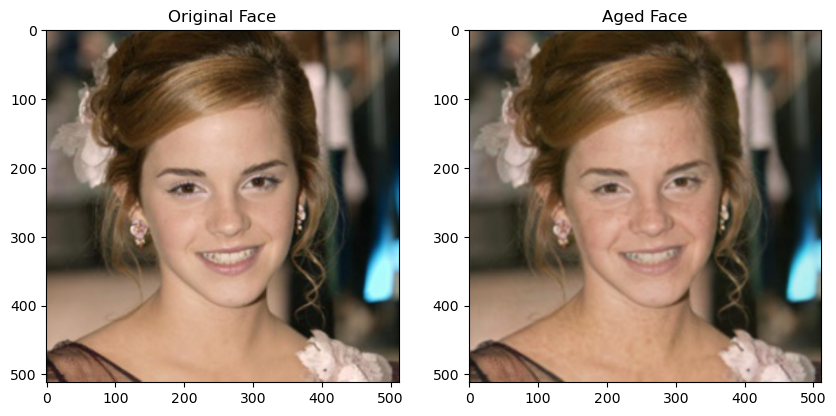

In [16]:
hardcoded_image_path = "emma.jpg"  # Replace with the actual path

# Create a list with a single entry (your hardcoded image)
image_paths = [hardcoded_image_path]

# Load and process the single image
img = Image.open(hardcoded_image_path).convert('RGB')
img = trans(img).unsqueeze(0)
aged_face = model(img)
aged_face = (aged_face.squeeze().permute(1, 2, 0).detach().numpy() + 1.0) / 2.0

# Plot the original and aged faces
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow((img.squeeze().permute(1, 2, 0).detach().numpy() + 1.0) / 2.0)
ax[0].set_title('Original Face')
ax[1].imshow(aged_face)
ax[1].set_title('Aged Face')

# Save the plot
plt.savefig("mygraph.png")